[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gabays/32M7131/blob/main/Cours_07/Cours_07.ipynb)

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licence Creative Commons" style="border-width:0;float:right;\" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

Distant Reading 2: linguistique computationnelle

# Stylistique

Simon Gabay

Installons [_SuperStyl_](https://github.com/SupervisedStylometry/SuperStyl), qui est développé par J.-B. Camps

## Préparation

In [1]:
# On clone le dépôt
!git clone https://github.com/SupervisedStylometry/SuperStyl.git
#Si vous êtes sur colab
%cd /content/SuperStyl
#Si vous êtes en local utilisez la commande suivante et commentez la précédente
#cd /content/SuperStyl
#Pensez à créer un environnement virtuel si vous êtes en local: décommentz les deux lignes infra
#!virtualenv -p python3.8 env
#!source env/bin/activate
!pip install -r /content/SuperStyl/requirements.txt
#Il faut ajouter cela
!pip install --upgrade pandas-profiling
# And get the model for language prediction
!mkdir superstyl/preproc/models
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin -P ./superstyl/preproc/models/

Cloning into 'SuperStyl'...
remote: Enumerating objects: 56897, done.
remote: Counting objects: 100% (563/563), done.
remote: Compressing objects: 100% (405/405), done.
remote: Total 56897 (delta 178), reused 515 (delta 157), pack-reused 56334
Receiving objects: 100% (56897/56897), 138.02 MiB | 15.25 MiB/s, done.
Resolving deltas: 100% (22337/22337), done.
/content/SuperStyl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 66.6 MB/s eta 0:00:00
  I

Maintenant on télécharge le corpus de travail

In [2]:
!wget https://github.com/gabays/32M7131/raw/main/Cours_07/corpus.zip
!unzip /content/SuperStyl/corpus.zip
#On retire un dossier qui est produit à cause de mon mac
!rm -rf /content/SuperStyl/__MACOSX

--2023-05-08 22:33:24--  https://github.com/gabays/32M7131/raw/main/Cours_07/corpus.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gabays/32M7131/main/Cours_07/corpus.zip [following]
--2023-05-08 22:33:25--  https://raw.githubusercontent.com/gabays/32M7131/main/Cours_07/corpus.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333205 (325K) [application/zip]
Saving to: ‘corpus.zip’

corpus.zip          100%[===================>] 325.40K  --.-KB/s    in 0.03s   

2023-05-08 22:33:25 (12.5 MB/s) - ‘corpus.zip’ saved [333205/333205]

Archive:  /content/SuperStyl/corpus.zip
   creating: corpus

## Découverte

Regardons quels sont les options

In [3]:
!python main.py --help

usage: main.py
       [-h]
       [-f F]
       [-t T]
       [-n N]
       [-p P]
       [-c C]
       [-k K]
       [--absolute_freqs]
       [--z_scores]
       [-s S [S ...]]
       [-x X]
       [--sampling]
       [--sample_units SAMPLE_UNITS]
       [--sample_size SAMPLE_SIZE]
       [--sample_step SAMPLE_STEP]
       [--max_samples MAX_SAMPLES]
       [--keep_punct]
       [--keep_sym]

options:
  -h, --help
    show this
    help
    message and
    exit
  -f F
    optional
    list of
    features in
    json
  -t T
    types of
    features
    (words or
    chars)
  -n N
    n grams
    lengths
    (default 1)
  -p P
    Processes
    to use
    (default 1)
  -c C
    Path to
    file with
    metadata
    corrections
  -k K
    How many
    most
    frequent?
  --absolute_freqs
    switch to
    get
    absolute
    instead of
    relative
    freqs
  --z_scores
    Use
    z-scores?
  -s S [S ...]
    paths to
    files
  -x X
    format
    (txt, xml
    or tei)
  --samp

On peut désormais créer la liste des trigrammes

In [15]:
!python main.py -s /content/SuperStyl/corpus/* -t chars -n 3


.......loading texts.......
.......getting features.......
K Limit ignored because the size of the list is lower (2778 < 5000)
.......getting counts.......
.......feeding data frame.......
100% 12/12 [00:00<00:00, 12.59it/s]
.......applying normalisations.......
.......saving results.......


Regardons à quoi ressemble cette liste

In [16]:
!head /content/SuperStyl/feats_tests_n3_k_5000.csv

,author,lang,_de,es_,re_,_qu,_vo,us_,ur_,le_,de_,nt_,_et,_le,ous,et_,eur,que,is_,e_e,our,e_s,vou,er_,ns_,_co,_en,_se,on_,ne_,s_d,ue_,_a_,_ma,_so,_je,e_d,e_l,e_a,me_,e_p,je_,te_,_mo,e_m,ux_,ent,e_v,tre,ce_,_ce,e_c,ez_,_un,_me,_la,it_,ais,_il,_l_,il_,_po,s_s,_re,la_,_sa,_pa,en_,s_e,s_l,s_p,t_d,eux,ait,ui_,est,rs_,s_a,ant,_es,un_,les,s_c,se_,pou,_pr,_to,s_m,_pe,e_j,rai,ut_,e_t,t_l,ir_,tou,_d_,_no,des,qu_,_tr,par,_au,sse,ans,mai,ain,_fa,st_,son,ont,ire,ien,s_q,oi_,_pl,end,pre,con,e_q,lle,ts_,r_l,res,t_p,urs,e_n,ere,_su,_do,t_s,out,r_d,ort,mon,_ne,s_v,e_f,t_e,qui,in_,per,che,_di,l_a,ins,ign,gne,oir,nce,mes,s_t,cou,san,dan,e_i,l_e,os_,s_j,_te,oin,t_a,nte,_in,ble,e_r,n_c,n_a,_ch,ieu,dre,_ve,ter,_ai,r_s,_av,men,t_c,moi,t_q,onn,r_m,n_e,_da,voi,_j_,ndr,fai,ons,t_m,eme,ver,une,leu,_si,nne,lus,sei,_cr,si_,ret,r_e,ai_,int,plu,a_v,as_,_vi,a_m,otr,ten,_m_,ses,uel,ma_,ess,ell,_ou,ois,a_p,ran,ser,ure,_am,n_d,oeu,sou,ie_,and,reu,emp,_on,el_,ouv,_n_,ren,neu,don,ces,i_d,iss,ave,s_r,uis,n_s,nou,tte,s_i,jou

Lançons un entraînement lambda avec une validation croisée de 10 et une banale normalisation des vecteurs (une explication [se trouve ici](https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261), mais accrochez vous).

On pourrait utiliser `--cross_validate leave-one-out` (on retire les classes une par une) mais c'est un peu extrême étant donné le nombre de classes.

In [17]:
!python train_svm.py /content/SuperStyl/feats_tests_n3_k_5000.csv --norm --cross_validate k-fold --k 10

.......... loading data ........
.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('model', LinearSVC())]
.......... k-fold cross validation will be performed ........
.......... using 10 samples ........
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished
              precision    recall  f1-score   support

  CAMPISTRON       0.67      0.50      0.57         4
      PRADON       0.80      1.00      0.89         4
      RACINE       0.50      0.50      0.50         4

    accuracy                           0.67        12
   macro avg       0.66      0.67      0.65        12
weighted avg       0.66      0.67      0.65        12



avec 67%, les résultats ne sont pas géniaux… Il va falloir faire mieux



## Aller plus loin

### Jouer sur les méthodes de classification

 Tentons plusieurs méthodes. Par exemple en utilisant `--class_weights` qui va permettre de réduire le problème lié à la différence de fréquence entre les classes (certains trigrammes reviennent en effet plus fréquemment que d'autres).

In [18]:
!python train_svm.py /content/SuperStyl/feats_tests_n3_k_5000.csv --norms --cross_validate k-fold --k 10 --class_weights

.......... loading data ........
.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('model', LinearSVC(class_weight='balanced'))]
.......... k-fold cross validation will be performed ........
.......... using 10 samples ........
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
              precision    recall  f1-score   support

  CAMPISTRON       0.75      0.75      0.75         4
      PRADON       0.80      1.00      0.89         4
      RACINE       0.67      0.50      0.57         4

    accuracy                           0.75        12
   macro avg       0.74      0.75      0.74        12
weighted avg       0.74      0.75      0.74        12



C'est mieux! Maintenant tentons autre chose, comme le _downsampling_ (sous-chantillonnage): nous allons prendre seulement des échantillons des classes les plus fréquentes. Plus d'information [ici](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data?hl=fr)!

In [19]:
!python train_svm.py /content/SuperStyl/feats_tests_n3_k_5000.csv --norms --cross_validate k-fold --k 10 --balance downsampling

.......... loading data ........
.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC())]
.......... k-fold cross validation will be performed ........
.......... using 10 samples ........
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
              precision    recall  f1-score   support

  CAMPISTRON       1.00      1.00      1.00         4
      PRADON       0.80      1.00      0.89         4
      RACINE       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.

Ca c'est bien!

In [20]:
from IPython.display import Image

Image(url='https://i.gifer.com/fxt5.gif')

Peut-on encore faire mieux? Peut-être…

### Jouer sur la taille des échantillons

Tentons de contrôler la taille des échantillons traités en passant de 4 à une vingtaine grâce à la fonction `--sample`

In [21]:
!rm /content/SuperStyl/feats_tests_n3_k_5000.csv
!python main.py -s /content/SuperStyl/corpus/* -t chars -n 3 --sampling --sample_units words --sample_size 2000
!python train_svm.py /content/SuperStyl/feats_tests_n3_k_5000.csv --norms --cross_validate k-fold --k 10 --balance downsampling


.......loading texts.......
.......getting features.......
K Limit ignored because the size of the list is lower (2764 < 5000)
.......getting counts.......
.......feeding data frame.......
100% 73/73 [00:05<00:00, 14.22it/s]
.......applying normalisations.......
.......saving results.......
.......... loading data ........
.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC())]
.......... k-fold cross validation will be performed ........
.......... using 10 samples ........
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


## Analyse

### Observer les coefficients

Il peut être utile de regarder les classes qui font la classification avec la fonction `--get_coefs`

In [22]:
!python train_svm.py /content/SuperStyl/feats_tests_n3_k_5000.csv --norm --cross_validate k-fold --k 10 --balance downsampling --get_coefs

.......... loading data ........
.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC())]
.......... k-fold cross validation will be performed ........
.......... using 10 samples ........
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished
              precision    recall  f1-score   support

  CAMPISTRON       1.00      1.00      1.00        23
      PRADON       0.96      1.00      0.98        24
      RACINE       1.00      0.96      0.98        26

    accuracy                           0.99        73
   macro avg       0.

Regardons les résultats pour Racine

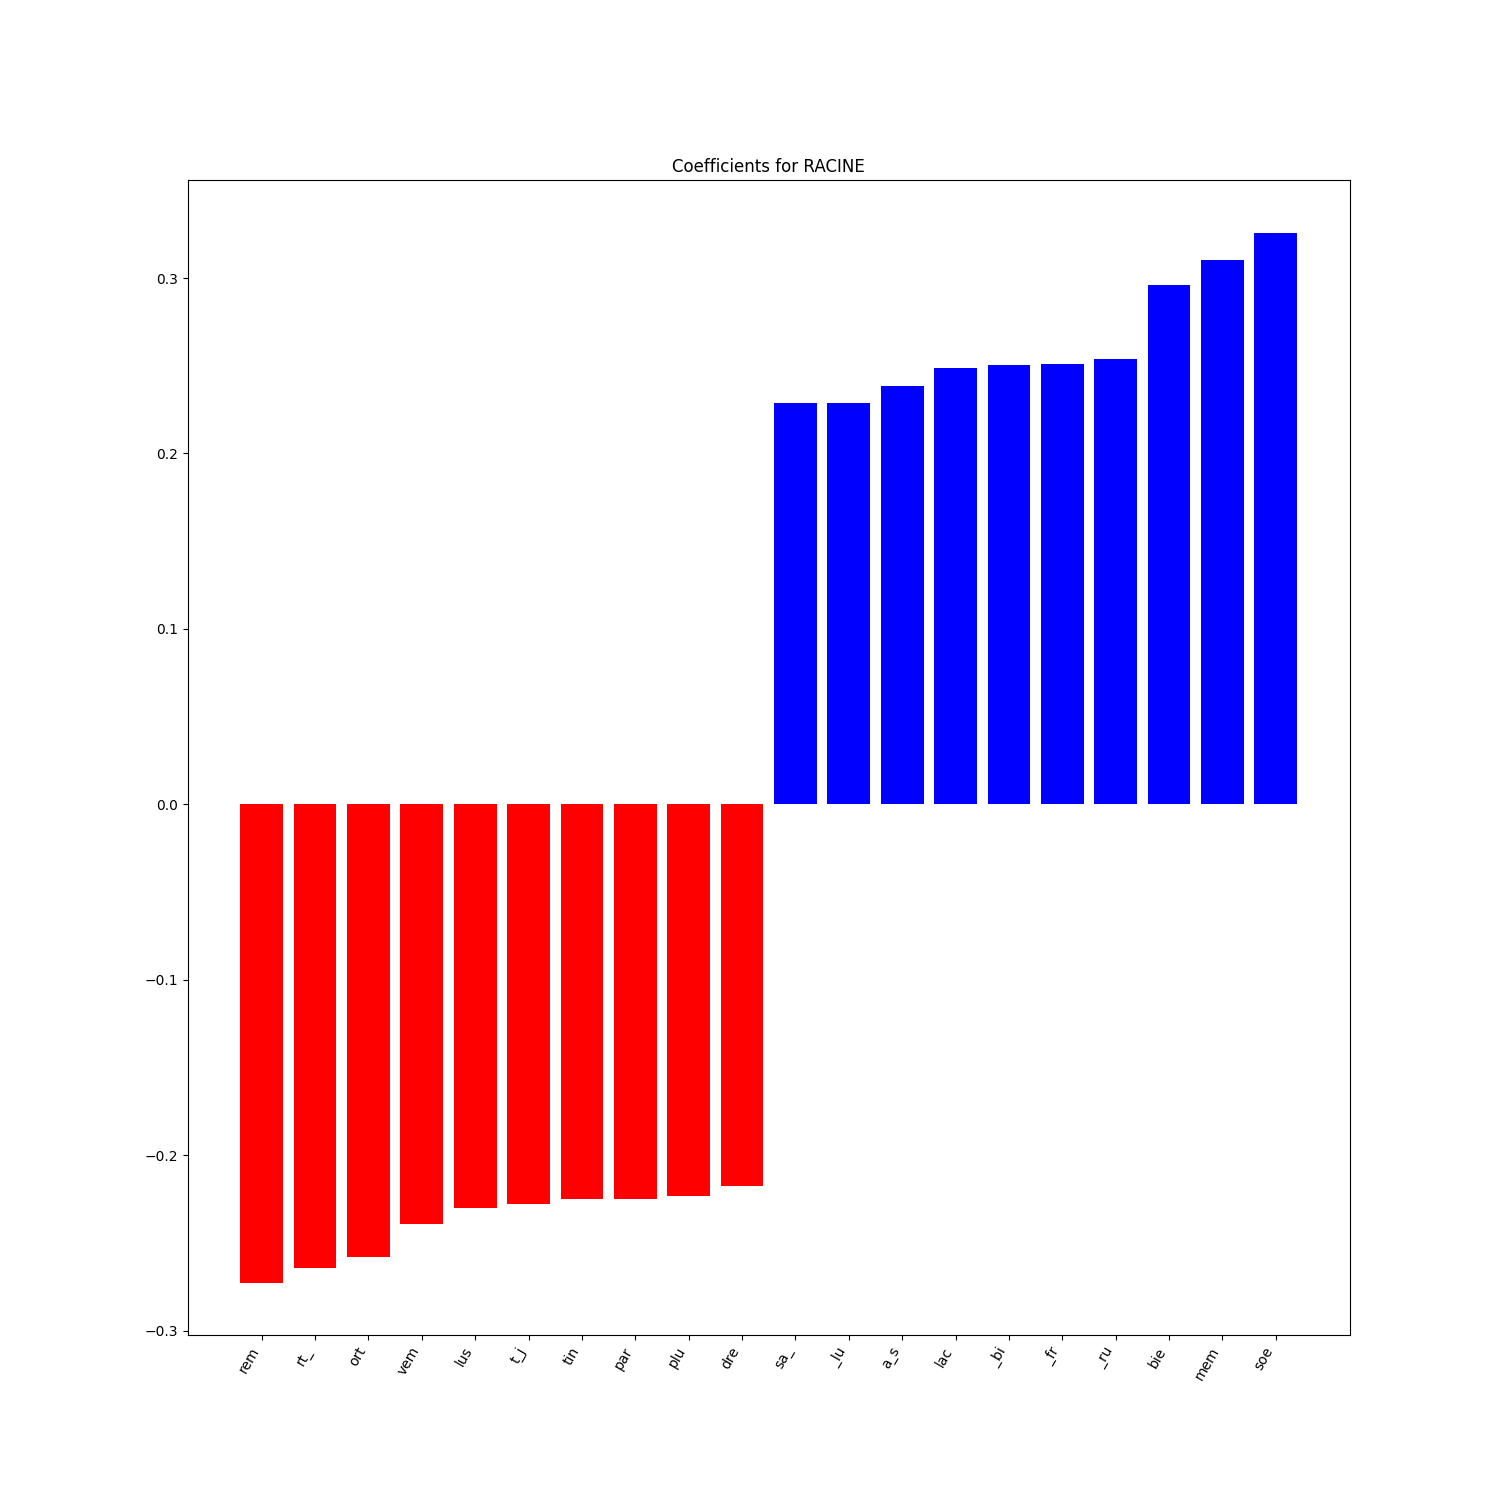

In [23]:
Image("/content/SuperStyl/coefs_RACINE.png", width=1000, height=1000)

### Prédiction

Maintenant nous devons savoir qui est le texte de ce texte. Téléchargeons-le

In [24]:
!wget https://raw.githubusercontent.com/gabays/32M7131/main/Cours_07/hidden_text.txt

--2023-05-08 22:59:48--  https://raw.githubusercontent.com/gabays/32M7131/main/Cours_07/hidden_text.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79921 (78K) [text/plain]
Saving to: ‘hidden_text.txt’

hidden_text.txt     100%[===================>]  78.05K  --.-KB/s    in 0.009s  

2023-05-08 22:59:48 (8.66 MB/s) - ‘hidden_text.txt’ saved [79921/79921]



On va sauvegarder les résultats

In [25]:
!mv /content/SuperStyl/feats_tests_n3_k_5000.csv /content/SuperStyl/train.csv

Maintenant nous allons créer des trigrammes à partir du texte inconnu EN TENANT COMPTE DES DONNEES PRECEDENTES

In [26]:
!python main.py -s /content/SuperStyl/hidden_text.txt -f /content/SuperStyl/feature_list_chars3grams5000mf.json -t chars -n 3 --sampling --sample_units words --sample_size 2000
!mv /content/SuperStyl/feats_tests_n3_k_5000.csv /content/SuperStyl/test.csv


.......loading texts.......
.......getting features.......
.......loading preexisting feature list.......
.......getting counts.......
.......feeding data frame.......
100% 7/7 [00:00<00:00, 11.79it/s]
.......applying normalisations.......
.......saving results.......


In [27]:
!head /content/SuperStyl/test.csv

,author,lang,_de,es_,re_,_qu,_vo,us_,ur_,le_,de_,nt_,_et,ous,_le,et_,que,eur,is_,e_e,our,vou,e_s,er_,ns_,_co,_en,_se,ne_,on_,ue_,s_d,_a_,_ma,_so,_je,e_d,me_,e_a,e_p,e_l,je_,te_,_mo,ux_,e_m,ent,e_v,tre,ce_,_ce,e_c,ez_,_un,_me,it_,_la,ais,_l_,_il,_po,il_,s_s,_sa,_re,en_,la_,_pa,s_e,s_l,s_p,t_d,ait,eux,ui_,est,s_a,rs_,ant,_es,un_,pou,s_c,se_,s_m,les,e_j,_pr,rai,_pe,_to,ut_,e_t,t_l,ir_,tou,_no,_d_,qu_,des,par,_tr,_au,ans,sse,ain,mai,_fa,son,st_,ire,ont,ien,s_q,end,oi_,e_q,pre,con,_pl,r_l,lle,res,ts_,ere,t_p,e_n,urs,t_s,_do,_ne,out,_su,mon,r_d,s_v,qui,e_f,t_e,ort,che,per,_di,in_,l_a,ins,ign,nce,gne,oir,cou,mes,san,s_t,dan,os_,oin,l_e,nte,e_i,_in,t_a,n_c,s_j,_te,n_a,ble,e_r,dre,ieu,_ch,_ve,_av,_ai,t_c,r_s,ter,t_q,men,r_m,moi,n_e,ndr,_da,_si,onn,_j_,voi,eme,une,fai,ret,t_m,ver,ons,_cr,si_,leu,int,as_,sei,ai_,lus,a_v,nne,r_e,otr,_m_,ses,ten,a_m,plu,_vi,ma_,ois,_ou,ess,uel,oeu,_am,n_d,ser,ell,a_p,sou,ran,and,_on,ure,emp,_n_,ouv,ces,ie_,ren,reu,i_d,ave,don,neu,iss,s_i,el_,n_s,tte,uis,sa_,nou,vot

Et maintenant nous pouvons tenter de savoir qui a écrit ce texte caché avec `--final`

In [28]:
!python train_svm.py /content/SuperStyl/train.csv --test_path /content/SuperStyl/test.csv --norm --balance downsampling --final

.......... loading data ........
.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... implementing strategy to solve imbalance in data ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler()), ('normalizer', Normalizer()), ('sampling', RandomUnderSampler(random_state=42)), ('model', LinearSVC())]
.......... Writing final predictions to FINAL_PREDICTIONS.csv ........


On peut désormais afficher les résultats

In [29]:
!cat /content/SuperStyl/FINAL_PREDICTIONS.csv

,filename,author,CAMPISTRON,PRADON,RACINE
0,text.txt_0-2000,RACINE,-0.40742801722476363,-0.7365734077385597,0.15453645179238745
1,text.txt_2000-4000,RACINE,-0.5987143920296017,-0.48370356699422457,0.09228892179708159
2,text.txt_4000-6000,RACINE,-0.5477392446549285,-0.5110334877391258,0.06832528695624701
3,text.txt_6000-8000,RACINE,-0.3899309797739446,-0.5932008721292261,-0.007634589092372246
4,text.txt_8000-10000,RACINE,-0.2775661659441229,-0.5411195150997603,-0.17131150889316765
5,text.txt_10000-12000,RACINE,-0.22447474080001525,-0.6662331617187272,-0.09932993414401356
6,text.txt_12000-14000,RACINE,-0.4293363289399491,-0.5975609649464714,0.03733385785393989


Alors, c'est qui?